# Visualização de Dados

Quando precisamos expôr resultados de forma objetiva e clara, devemos recorrer a recursos visuais. Uma boa visualização de dados se utiliza destes rercursos para chamar à atenção e a compreensão do público diante a análise que foi executada. Tabelas, gráficos, diagramas, etc, são exemplos de visulização. Desta forma, veremos que o Python nos oferece uma gama de opções para desenvolver tais recursos.

![banner.png](banner.png)

# Matplotlib

O `matplotlib` é a principal biblioteca de visualização de dados no Python. Trata-se de uma biblioteca muito completa, sendo ideal para gerar qualquer tipo de gráfico. No entanto, as opções de personalização dos gráficos podem ser massantes e complexas quando utilizamos apenas o `matplotlib` para gerar nossas visualizações, e por isso ferramentas como o `seaborn` facilitam a execução desta tarefa.

# Seaborn

A biblioteca `seaborn` simplifica e abstrai algumas configurações de temas que seriam mais complexas do `matplotlib`, gerando gráficos mais atrativos com códigos mais limpos e mais simples.

# Importação

In [1]:
import matplotlib.pyplot as plt  # É a principal ferramenta capaz de gerar gráficos no python
import seaborn as sns            # Baseado no matplotlib o seaborn é uma biblioteca que facilita a criacao de gráficos no matplotlib
import numpy as np               # Estaremos importando o numpy apenas para executar alguns exemplos
import pandas as pd              # Apenas para leitura de csv

## Gráfico de linha

Primeiramente foi criado uma lista de números naturais e em seguida elevamos esses números ao quadrado. Criamos um gráfico de linha que mostral qual é o número e seu comando plt.plot irá dizer para o python guardar em sua o gráfico em sua memória, e em seguida o comando plt.show() irá dizer para o python mostrar esse gráfico

### Apenas com matplot

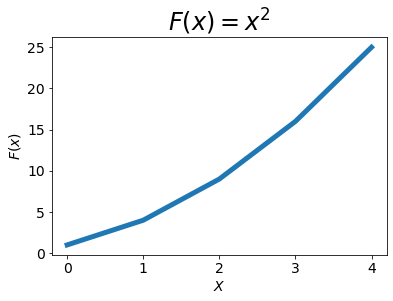

In [2]:
numeros = [1, 2, 3, 4, 5]
quadrados = [numero**2 for numero in numeros]

plt.plot(quadrados, linewidth=5)

# Configurando título e rótulos dos eixos.
plt.title('$F(x) = x^2$', fontsize=24)
plt.xlabel('$X$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)

# Mudando a grossura dos eixos.
plt.tick_params(axis='both', labelsize=14)

plt.show() # Para 'desenhar' o gráfico

In [3]:
sns.lineplot?

### Seaborn

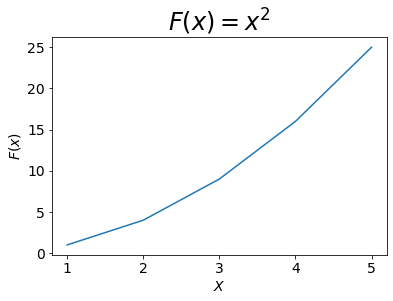

In [4]:
sns.lineplot(x=numeros , y=quadrados)

# Configurando título e rótulos dos eixos.
plt.title('$F(x) = x^2$', fontsize=24)
plt.xlabel('$X$', fontsize=14)
plt.ylabel('$F(x)$', fontsize=14)

# Mudando a grossura dos eixos.
plt.tick_params(axis='both', labelsize=14)

plt.show() # Para 'desenhar' o gráfico

## Gráfico de barras

Iremos criar uma classe chamada de "Die", essa classe imita um dado. Para ser iniciada, devemos passar Dice(Numero de faces no dado). Possui um método chamado de "dice_roll" que simula o lançamento do dado.


In [5]:
class Dado:
    """Classe representando um dado de X lados."""
    
    def __init__(self, n_lados=6):
        """Inicializa um dado com o número de dados igual a n_sides"""
        self.n_lados = n_lados
        
    def rolar_dado(self, n_lancamentos=1):
        """Lança o dado sorteado uma das faces"""
        return np.random.randint(1, self.n_lados + 1, n_lancamentos)

Aqui iremos simular o lançamento de 2 dados com 5 faces e soma-las e também o lançamento de 1 dado com 10 faces. Iremos fazer 10000 lançamentos e comparar a frequência de resultados obtidos.

In [6]:
d10 = Dado(10)
d5 = Dado(5)

resultados_d10 = list(d10.rolar_dado(10000))
    

resultados_2d5 =[d5.rolar_dado() + d5.rolar_dado() for lancamento in range(10000)]

frequencias_d10 = []

for valor in range(1, 11):
    frequencia = resultados_d10.count(valor)
    frequencias_d10.append(frequencia)

frequencias_2d5 = []
for valor in range(2, 11):
    frequencia = resultados_2d5.count(valor)
    frequencias_2d5.append(frequencia)
    
frequencias_2d5.insert(0,0)

Iremos utilizar o comando plt.bar para dizer ao python para guardar em sua memória 1 gráfico de barras, iremos utilizar o comando duas vezes para os gráficos fiquem sobrepostos e por fim iremos utilizar plt.show() para que o python mostre os gráficos.

### Seaborn

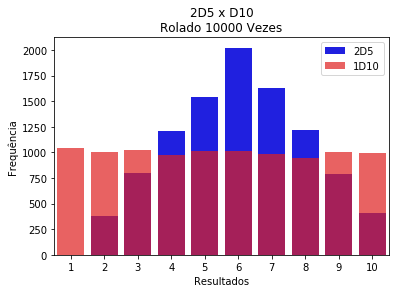

In [7]:
sns.barplot(x=list(range(1,11)), 
            y=frequencias_2d5,
            color="blue",
            label='2D5')

sns.barplot(x=list(range(1,11)),
            y=frequencias_d10, 
            color="red", 
            alpha=0.7,
            label = '1D10')

plt.title('2D5 x D10\nRolado 10000 Vezes')   # Adiciona título ao gráfico
plt.ylabel('Frequência')                     # Adiciona um rótulo ao eixo y
plt.xlabel('Resultados')                     # Adiciona um rótulo ao eixo x
plt.legend()                    # Adiciona legenda ao gráfico
plt.show()                                   # O plt.show() nos mostra o gráfico no final da linha de código

In [8]:
"Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns:"

"Now let's take a look at how it works with Seaborn. As we will see, Seaborn has many of its own high-level plotting routines, but it can also overwrite Matplotlib's default parameters and in turn get even simple Matplotlib scripts to produce vastly superior output. We can set the style by calling Seaborn's set() method. By convention, Seaborn is imported as sns:"

## Gráfico de distribuições

Geraremos uma amostra aleatória de tamanho 100 de uma população normal padrão utilizando a biblioteca numpy, com o intuito de gerar dados para os gráficos.

$$X \sim N(0,1)$$

In [9]:
np.random.seed(29)
d = np.random.normal(size=100)
d[:10]

array([-0.41748213,  0.7060321 ,  1.9159847 , -2.1417555 ,  0.71905689,
        0.46707262,  0.76672253,  0.88200945,  0.80875066, -0.94716485])

O método `sns.distplot` irá gerar um gráfico da nossa distribuição. O argumento `kde` recebe um booleano, em caso de `False` ele irá gerar um simples histograma de nossa distribuição pos omitirá a curva de densidade da distribuição da nossa amostra.

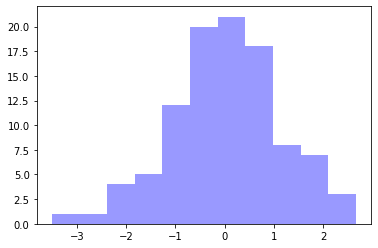

In [10]:
sns.distplot(d, kde=False, color="b")
plt.show() 

Similar ao código anterior, o próximo gráfico recebe o argumento `hist` com o valor `False` isso fará com que o histograma seja omitido e apenas a cruva de densidade distribuição da nossa amostra apareça.
O argumento `rug` também recebe um booleano, em caso de `True` adiciona *rug plot* ao nosso gráfico.

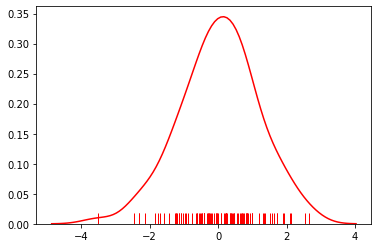

In [11]:
sns.distplot(d, hist=False, rug=True, color="r")
plt.show()

Se desejamos plotar nosso gráfico com o histograma e a curva da densidade, podemos utilizar o método `sns.distplot` apenas passando nossa amostra como argumento

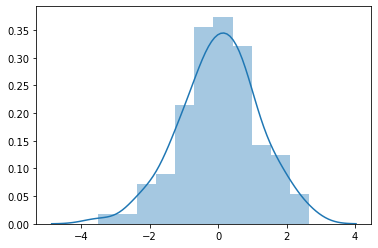

In [12]:
sns.distplot(d)
plt.show()

Se quisermos colocar várias distribuições no mesmo conjunto de eixos.

In [13]:
gamma_0 = np.random.gamma(5, 3, 100) # Gerando a amostra
gamma_1 = np.random.gamma(3, 2, 100)

$$ X \sim Gamma(5, 3)$$
$$ Y \sim Gamma(3, 2)$$

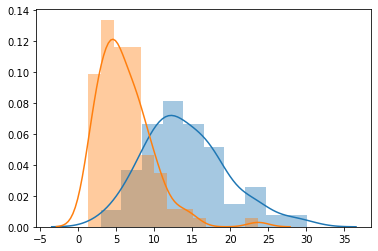

In [14]:
sns.distplot(gamma_0)
sns.distplot(gamma_1)
plt.show()

## Gráfico de setores

Para gerar um gráfico de setores (pizza) devemos primeiro contruir uma lista com as contagens de cada elemento e a outra lista com os rótulos desejados para cada contagem.

Utilizaremos um banco de dados localizado na pasta `datasets/` sobre o desempenho de alunos em testes de matemática e leitura.

In [15]:
# Lendo o arquivo
data = pd.read_csv('datasets/StudentsPerformance.csv')
data.keys() # Verificando quais colunas nosso arquivo possui

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

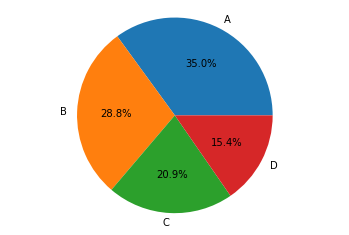

In [16]:
labels = ['A', 'B', 'C', 'D'] # Criando rótulos dos grupos étnicos
# Colocando a contagem de cada elmento de um a coluna em uma lista
contagem = [data['race/ethnicity'].value_counts()[0],
        data['race/ethnicity'].value_counts()[1],
        data['race/ethnicity'].value_counts()[2],
        data['race/ethnicity'].value_counts()[3]]

fig1, ax1 = plt.subplots() # Criando uma área "plotável"
ax1.pie(contagem, labels=labels, autopct='%1.1f%%')
ax1.axis('equal')
plt.show()

## Boxplot

`sns.boxplot` é o metodo responsável por criar boxplots. Temos como argumentos  os valores de `x` e `y`. Além disso, podemos colocar o argumento `hue` que recebe uma string com o nome de uma coluna com dados categórico, com o intuito de separar nossa observação nesses grupos. `palette` seleciona a paleta de cores, neste caso magenta e verde.

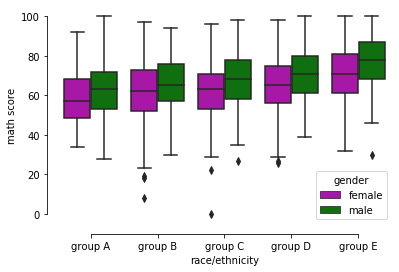

In [23]:
sns.boxplot(x="race/ethnicity", y="math score",
            hue="gender", palette=["m", "g"],
            order=['group A', 'group B', 'group C', 'group D', 'group E'],
            data=data)
sns.despine(offset=10, trim=True) # retira as bordas

## Gráficos de dispersão

Para gerar um simples gráfico de dispersão podemos utilizar o método `sns.scatterplot` apenas passando as veriáveis de interesse que desejamos comparar.

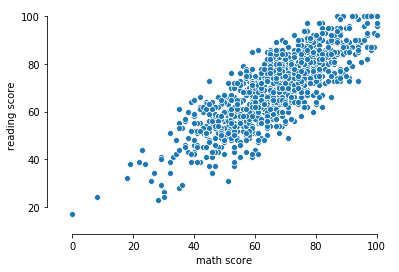

In [18]:
sns.scatterplot(x="math score", y="reading score",
                data=data);
sns.despine(offset=10, trim=True)

## Gráficos de dispersão com reta de regressão

O método `sns.regplot` também recebe como argumentos as variáveis que desejamos estudar a correlação, sendo muito semelhante ao método que gera um gráfico de dispersão. 

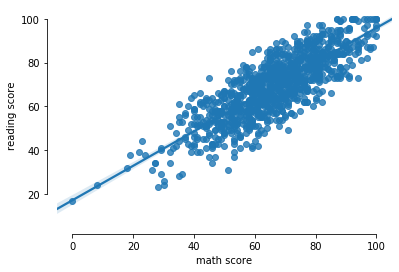

In [19]:
sns.regplot(x="math score", y="reading score", data=data);
sns.despine(offset=10, trim=True)

Agora vejamos como é simples criar em uma punica imagem um gráfico de regressão que separa em nossa amostra em dois grupos, neste caso o gênero.

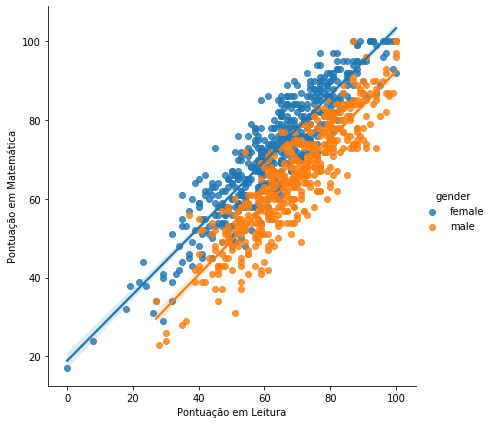

In [20]:
g = sns.lmplot(x="math score", y="reading score", hue="gender", # Bastou adicionar o argumento `hue` seguido da coluna com variáveis
               # categórias
               truncate=True, height=6, data=data)

g.set_axis_labels("Pontuação em Leitura", "Pontuação em Matemática")
plt.show()

## Criando painel

Utilizando o método `plt.subplots()` gera um "quadro" para que alocar os nossos gráficos. 
Os argumentos `nrows` e `ncols` determinam a número de linhas e colunas do nosso painel, respectivamente.
O argumento `figsize` recebe um `array` com a altura e largura dos quadros.

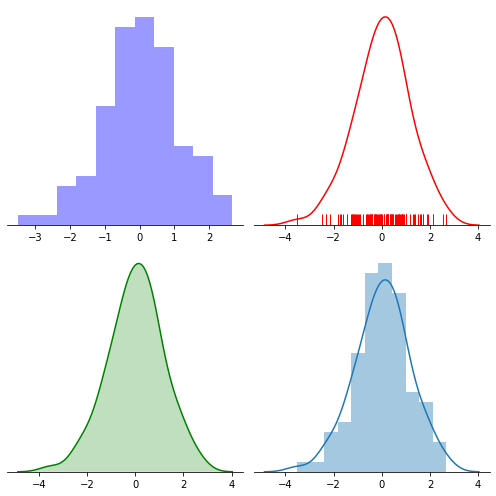

In [21]:
f, axes = plt.subplots(2, 2, figsize=(7, 7)) 
sns.despine(left=True) # Retira as bordas dos quadros

np.random.seed(29)
d = np.random.normal(size=100) # Gerando uma amostra aleatória de tamanho 100 de uma população normal padrão

# A partir daqui podemos criar os gráficos normalmente alocando-os nos seus devidos "espaços"
sns.distplot(d, kde=False, color="b", ax=axes[0, 0]) # Em `ax` devemos passar uma lista com a posição do quadro
#  que queremos para este gráfico neste exemplo `[0, 0]` é o primeiro espaço para gráfico, ou seja, superior esquerdo.

sns.distplot(d, hist=False, rug=True, color="r", ax=axes[0, 1])
sns.distplot(d, hist=False, color="g", kde_kws={"shade": True}, ax=axes[1, 0])
sns.distplot(d, ax=axes[1, 1])
plt.setp(axes, yticks=[])
plt.tight_layout()